In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [35]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [33]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [4]:
from functools import partial
my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    #my_dense_layer(500),
    my_dense_layer(300),
    my_dense_layer(200),
    my_dense_layer(10, activation="softmax")
])

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 157s 3ms/sample - loss: 0.6613 - accuracy: 0.8015 - val_loss: 0.4979 - val_accuracy: 0.8550
Epoch 2/15
55000/55000 [==============================] - 27s 496us/sample - loss: 0.4790 - accuracy: 0.8547 - val_loss: 0.4560 - val_accuracy: 0.8642
Epoch 3/15
55000/55000 [==============================] - 27s 489us/sample - loss: 0.4396 - accuracy: 0.8673 - val_loss: 0.4327 - val_accuracy: 0.8660
Epoch 4/15
55000/55000 [==============================] - 27s 498us/sample - loss: 0.4129 - accuracy: 0.8757 - val_loss: 0.4083 - val_accuracy: 0.8764
Epoch 5/15
55000/55000 [==============================] - 33s 594us/sample - loss: 0.3944 - accuracy: 0.8827 - val_loss: 0.3985 - val_accuracy: 0.8824
Epoch 6/15
55000/55000 [==============================] - 28s 513us/sample - loss: 0.3781 - accuracy: 0.8866 - val_loss: 0.3877 - val_accuracy: 0.8828
Epoch 7/15
55000/55000 [======================

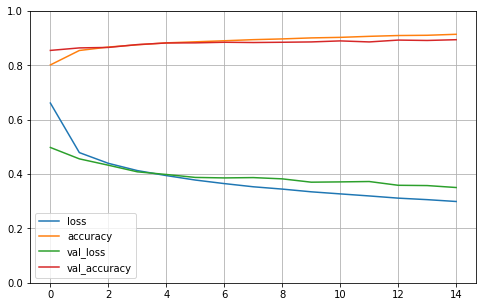

In [7]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [8]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4952    6   99   86    7    3  383    0    7    0]
 [   5 5373    1   52    7    0    6    0    0    0]
 [  43    3 4747   39  299    0  362    0    3    0]
 [  96   23   44 5119  144    0   71    0    2    0]
 [   7    6  424  131 4566    0  373    0    5    0]
 [   0    0    1    0    0 5453    0   50    1    2]
 [ 535    5  283  102  170    0 4404    0    8    0]
 [   0    0    0    0    0   47    0 5396    4   41]
 [   9    2   20   11   14    6   21   12 5415    0]
 [   0    1    0    0    0   27    0  264    0 5202]]


In [9]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 276us/sample - loss: 0.3838 - accuracy: 0.8833


[0.38375522260665895, 0.8833]

In [10]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[836   1  21  22   4   1 107   0   8   0]
 [  3 973   0  19   3   0   2   0   0   0]
 [ 13   0 818  13  67   0  88   0   1   0]
 [ 22   9  14 896  29   0  26   0   4   0]
 [  0   1 103  25 784   0  86   0   1   0]
 [  0   0   0   1   0 970   0  24   2   3]
 [121   2  79  28  53   0 708   0   9   0]
 [  0   0   0   0   0  20   0 967   0  13]
 [  7   0   7   6   5   4   7   5 959   0]
 [  0   0   0   0   0  12   1  65   0 922]]


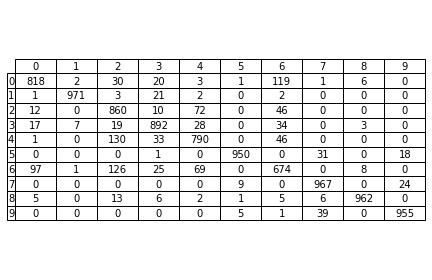

In [106]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat.pdf')

In [36]:
#convolutional neural network
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [37]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.00001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", padding="valid")

model = tf.keras.models.Sequential([
    my_conv_layer(6,5,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.AveragePooling2D(2),
    my_conv_layer(16,5),
    tf.keras.layers.AveragePooling2D(2),
    my_conv_layer(120,5),
    tf.keras.layers.Flatten(),
    my_dense_layer(84),
    my_dense_layer(10, activation="softmax")
])

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [39]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 77s 1ms/sample - loss: 0.5742 - accuracy: 0.7898 - val_loss: 0.4228 - val_accuracy: 0.8458
Epoch 2/10
55000/55000 [==============================] - 72s 1ms/sample - loss: 0.3950 - accuracy: 0.8556 - val_loss: 0.3541 - val_accuracy: 0.8754
Epoch 3/10
55000/55000 [==============================] - 63s 1ms/sample - loss: 0.3447 - accuracy: 0.8740 - val_loss: 0.3543 - val_accuracy: 0.8730
Epoch 4/10
55000/55000 [==============================] - 60s 1ms/sample - loss: 0.3149 - accuracy: 0.8849 - val_loss: 0.3183 - val_accuracy: 0.8856
Epoch 5/10
55000/55000 [==============================] - 64s 1ms/sample - loss: 0.2900 - accuracy: 0.8931 - val_loss: 0.3026 - val_accuracy: 0.8914
Epoch 6/10
55000/55000 [==============================] - 63s 1ms/sample - loss: 0.2709 - accuracy: 0.8999 - val_loss: 0.2945 - val_accuracy: 0.8972
Epoch 7/10
55000/55000 [==============================] -

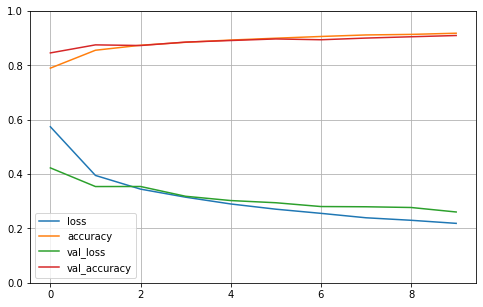

In [40]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [41]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4734   10   36   85   11    0  654    0   13    0]
 [   1 5399    0   39    3    0    0    0    2    0]
 [  43    3 4866   42  256    0  278    0    8    0]
 [  65   38    5 5192  144    0   53    0    2    0]
 [   1    5  339  116 4825    0  218    0    8    0]
 [   0    1    0    1    0 5413    0   59   11   22]
 [ 351    8  265  117  260    0 4487    0   19    0]
 [   0    0    0    0    0   31    0 5319    2  136]
 [   0    2    4   10    2    0   13    1 5478    0]
 [   0    0    0    1    0   10    0  119    1 5363]]


In [42]:
model.evaluate(X_test,y_test) 

10000/10000 [==============================] - 5s 495us/sample - loss: 0.2791 - accuracy: 0.9024


[0.27909752118587494, 0.9024]

In [131]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[878   0  31   7   5   1  67   0  11   0]
 [  3 978   0  12   3   0   4   0   0   0]
 [ 14   1 897   5  28   0  52   0   3   0]
 [ 31   7  23 866  42   0  28   0   3   0]
 [  0   1 102  16 764   0 115   0   2   0]
 [  0   0   0   0   0 963   0  30   2   5]
 [122   2  87  10  39   1 731   0   8   0]
 [  0   0   0   0   0   3   0 974   0  23]
 [  3   0   1   3   1   1   3   1 987   0]
 [  0   0   0   0   0   6   1  35   0 958]]


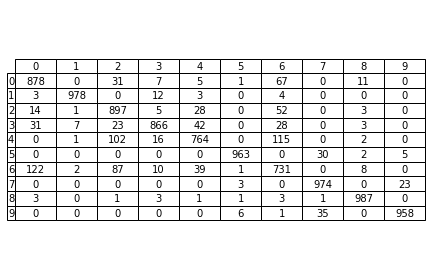

In [133]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat.pdf')